# Ma513 Project

Student: MAZURIE Corentin

### Initialization

We start by importing the necessary libraries

In [1]:
import numpy as np
from keras.optimizers import Adam
from keras.models import load_model
from data_related import load_data, save_data
from model import cnn_model, my_cnn_model, svm_classifier, train
from visualization import visualize_data, plot_confusion_matrix, plot_model_training, print_scores

### Import data

The data is stored in the Pickle file *dict_data.pkl*

In [2]:
# Import the data
d = load_data('datasets/dict_data.pkl', load_pickle=True)
x_train, x_test, y_train, y_test = d['x_train'], d['x_test'], d['y_train'], d['y_test']

# Labels are stored as hot one vectors, we convert them into their true values
y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Get sets containing all the data
x_all = d['x']
y_all = d['y']
y_all_true = np.argmax(y_all, axis=1)

Loading datasets/dict_data.pkl


We also define the hyperparameters for the training.

In [5]:
# Hyperparameters are defined here
nb_epochs = 100
bs = 256
val_split = 0.2
learning_rate = 1e-3

We can plot some images of the dataset to see what it looks like using *visualize_data*.

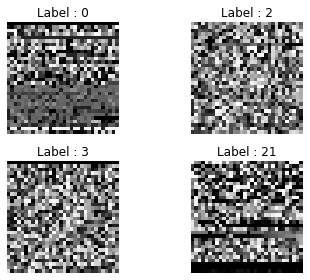

In [6]:
# Visualize the data
visualize_data(d['x'], y_all_true, [0, 1000, 4000, 8000])

### Solo SVM Model

We try a simple SVM classifier to see how it performs. We use *svm_classifier*.

Accuracy : 78.97%
F1 score : 0.79
Precision : 0.79
Recall : 0.79


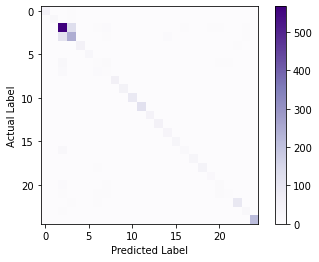

In [7]:
# Build a simple classifier
solo_svm = svm_classifier(x_train, y_train_true)

# We make a prediction and print the performance
solo_y_pred = solo_svm.predict(x_test)
print_scores(y_test_true, solo_y_pred)

# We plot the confusion matrix
plot_confusion_matrix(y_test_true, solo_y_pred)

### Paper's CNN-SVM Model 

We first load the CNN model described in the paper.

We can either load it from the keras file *article_model.keras* (UNAVAILABLE FOR SIZE REASONS)
or from the function *cnn_model* to train it.

In [11]:
# True if you want to train the model
to_train = True

article_model_path = "models/article_model.keras"
article_model_hist_path = "models/article_model_history.pkl"

# Load the CNN Model of the article and train it
if to_train:
    article_model, article_hist = train(model=cnn_model(), 
                                        x_train=x_train, 
                                        y_train=y_train, 
                                        epochs=nb_epochs, 
                                        batch_size=bs, 
                                        validation_split=val_split, 
                                        learning_rate=learning_rate, 
                                        model_save_file=article_model_path,
                                        history_save_file=article_model_hist_path)
# Load the CNN model from file
else:
    article_model = load_model(article_model_path)
    article_hist = load_data(article_model_hist_path, load_pickle=True)

Epoch 1/100
22/22 [==============================] - 4s 123ms/step - loss: 4.0308 - accuracy: 0.3500 - val_loss: 1.3386 - val_accuracy: 0.5953
Epoch 2/100
22/22 [==============================] - 2s 84ms/step - loss: 1.1246 - accuracy: 0.6529 - val_loss: 0.7693 - val_accuracy: 0.7523
Epoch 3/100
22/22 [==============================] - 2s 84ms/step - loss: 0.7788 - accuracy: 0.7492 - val_loss: 0.6196 - val_accuracy: 0.7844
Epoch 4/100
22/22 [==============================] - 2s 85ms/step - loss: 0.6357 - accuracy: 0.7824 - val_loss: 0.5310 - val_accuracy: 0.8051
Epoch 5/100
22/22 [==============================] - 2s 83ms/step - loss: 0.5576 - accuracy: 0.7996 - val_loss: 0.4920 - val_accuracy: 0.8130
Epoch 6/100
22/22 [==============================] - 2s 83ms/step - loss: 0.5045 - accuracy: 0.8067 - val_loss: 0.4553 - val_accuracy: 0.8201
Epoch 7/100
22/22 [==============================] - 2s 83ms/step - loss: 0.4521 - accuracy: 0.8222 - val_loss: 0.4234 - val_accuracy: 0.8237
Epoch

We can plot the loss and accuracy per epoch using *plot_model_training*.

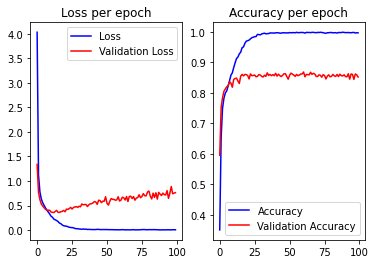

In [12]:
# Plot loss and accuracy
plot_model_training(article_hist, nb_epochs)

We then test the performance of the CNN model using *print_scores*.

The scores printed are accuracy, F1 score, recall and precision.

In [13]:
# Make a prediction and print scores
cnn_y_pred = np.argmax(article_model.predict(x_test), axis=1)
print_scores(y_test_true, cnn_y_pred)

73/73 [==============================] - 1s 8ms/step
Accuracy : 86.47%
F1 score : 0.86
Precision : 0.87
Recall : 0.86


We plot the confusion matrix to see where the model makes mistakes. We use *plot_confusion_matrix*.

73/73 [==============================] - 1s 7ms/step


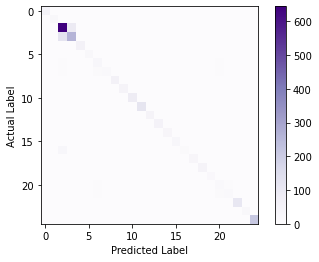

In [14]:
# Plot confusion matrix
cnn_y_pred = np.argmax(article_model.predict(x_test), axis=1)
plot_confusion_matrix(y_test_true, cnn_y_pred)

Now we add the L2-SVM classifier using *svm_classifier*.

In [15]:
# Build the CNN-SVM model, we use the true labels and not the hot one vectors
article_cnn_svm = svm_classifier(x_train, y_train_true, article_model)

219/219 [==============================] - 1s 6ms/step


c:\Users\deads\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


73/73 [==============================] - 1s 8ms/step
Accuracy : 86.81%
F1 score : 0.87
Precision : 0.87
Recall : 0.87


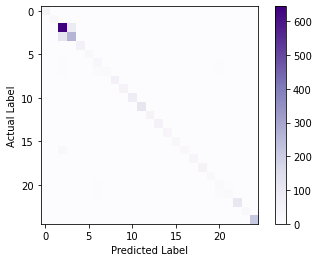

In [16]:
# Make a prediction and print score
x_features = article_model.predict(x_test)
article_cnn_svm_pred = article_cnn_svm.predict(x_features)
print_scores(y_test_true, article_cnn_svm_pred)

# Plot confusion matrix
plot_confusion_matrix(y_test_true, article_cnn_svm_pred)

### Our CNN-SVM Model

We first start by importing the CNN model. We can either load it from file or create and train it using *my_cnn_model*.

In [19]:
# True if you want to train the model
to_train = False

my_model_path = 'models/MAZURIE_Model.keras'
my_model_hist_path = 'models/MAZURIE_Model_history.pkl'

# Load the CNN Model and train it
if to_train:
    my_model, my_model_hist = train(model=my_cnn_model(), 
                                        x_train=x_train, 
                                        y_train=y_train, 
                                        epochs=4 * nb_epochs, 
                                        batch_size=bs, 
                                        validation_split=val_split, 
                                        learning_rate=learning_rate, 
                                        model_save_file=my_model_path,
                                        history_save_file=my_model_hist_path)
# Load the CNN Model from file
else:
    my_model = load_model(my_model_path)
    my_model_hist = load_data(my_model_hist_path, load_pickle=True)

Loading models/MAZURIE_Model_history.pkl


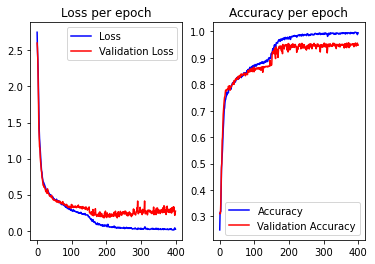

In [20]:
# Plot loss and accuracy
plot_model_training(my_model_hist, 4 * nb_epochs)

We plot the score and confusion matrix.

73/73 [==============================] - 1s 4ms/step
Accuracy : 96.49%
F1 score : 0.97
Precision : 0.97
Recall : 0.96


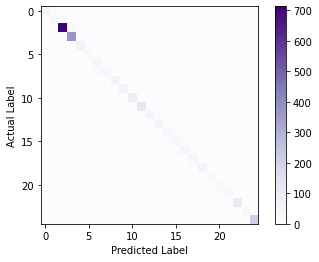

In [21]:
# Make a prediction and print scores
my_cnn_y_pred = np.argmax(my_model.predict(x_test), axis=1)
print_scores(y_test_true, my_cnn_y_pred)

# Plot confusion matrix
plot_confusion_matrix(y_test_true, my_cnn_y_pred)

In [22]:
# Build the CNN-SVM model, we use the true labels and not the hot one vectors
my_cnn_svm = svm_classifier(x_train, y_train_true, my_model)

219/219 [==============================] - 1s 5ms/step


c:\Users\deads\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


73/73 [==============================] - 1s 11ms/step
Accuracy : 96.53%
F1 score : 0.97
Precision : 0.97
Recall : 0.97


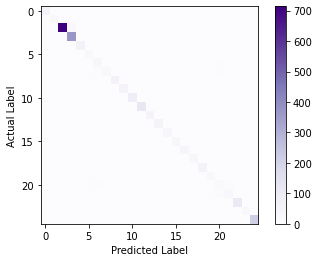

In [23]:
# Make a prediction and print score
my_x_features = my_model.predict(x_test)
my_cnn_svm_pred = my_cnn_svm.predict(my_x_features)
print_scores(y_test_true, my_cnn_svm_pred)

# Plot confusion matrix
plot_confusion_matrix(y_test_true, my_cnn_svm_pred)